In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Before run this script, run program that generate learn.txt and test_during_learn.txt files

In [3]:
df_l = pd.read_csv("learn_evaluting_Standard.txt", sep=';')

In [4]:
df_l.head()

,MapNumber,EpochNumber,distortion,distortion_gss,quantization,quantization_gss
0,0,0,0.026841,0.313882,0.080567,0.507459
1,0,1,0.018493,0.327225,0.050714,0.532026
2,0,2,0.019558,0.380341,0.051374,0.597792
3,0,3,0.017437,0.400548,0.047243,0.606135
4,0,4,0.015991,0.307969,0.042544,0.515394


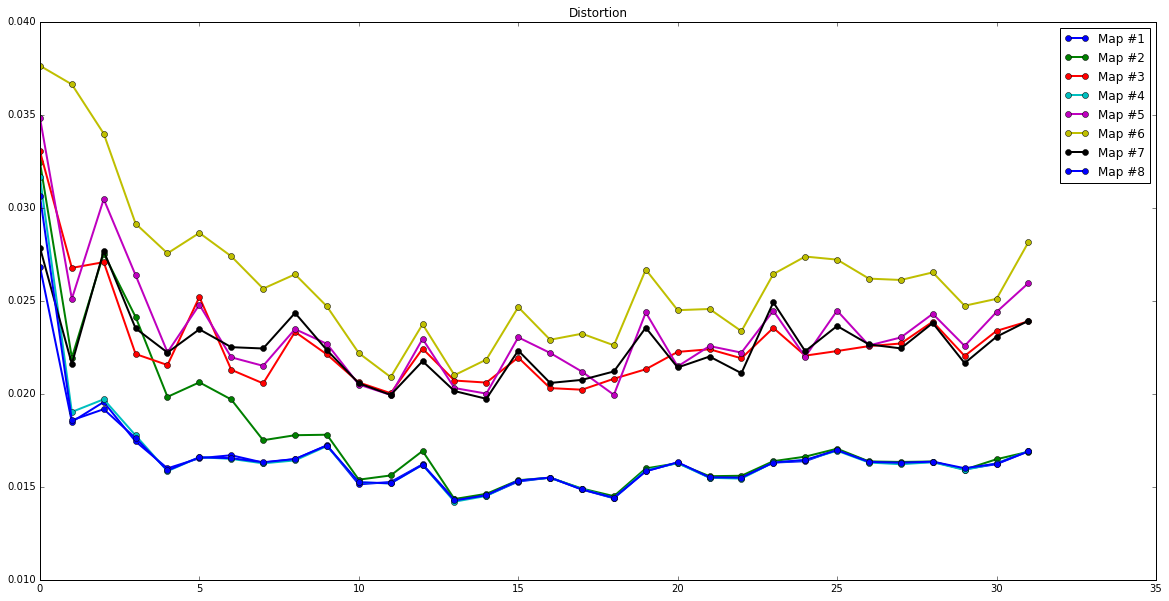

In [5]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_l.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Distortion')
    plt.plot(df_l[df_l['MapNumber']==i].reset_index(drop=True)['distortion'], label= 'Map #'+str(i+1), marker='o',
            linewidth=2.0)
    plt.legend()

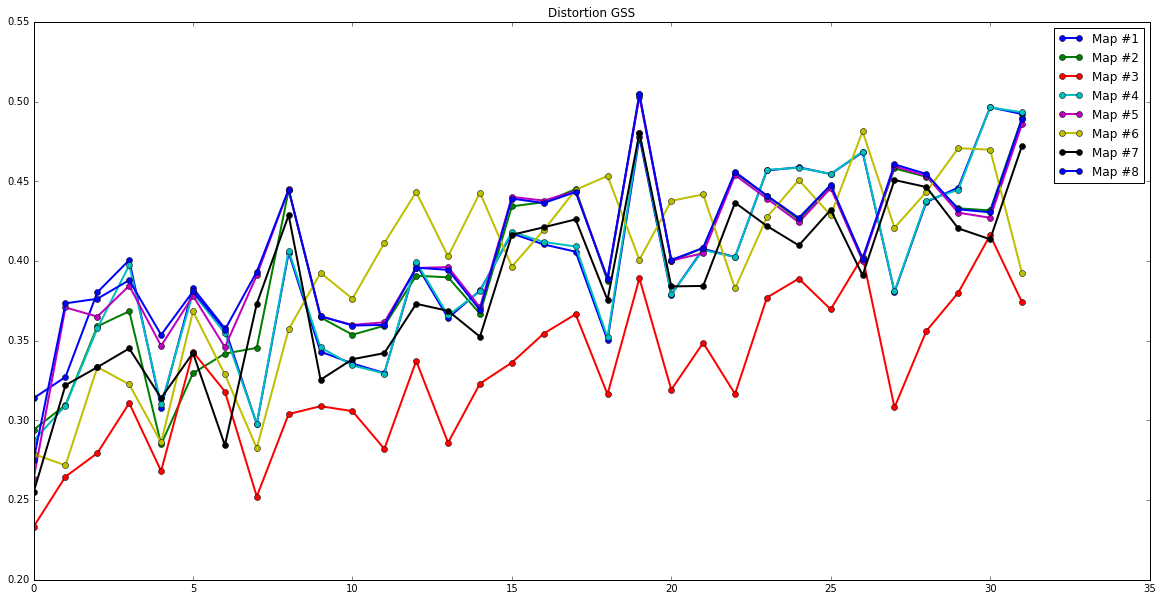

In [6]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_l.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Distortion GSS')
    plt.plot(df_l[df_l['MapNumber']==i].reset_index(drop=True)['distortion_gss'], label= 'Map #'+str(i+1), marker='o',
            linewidth=2.0)
    plt.legend()

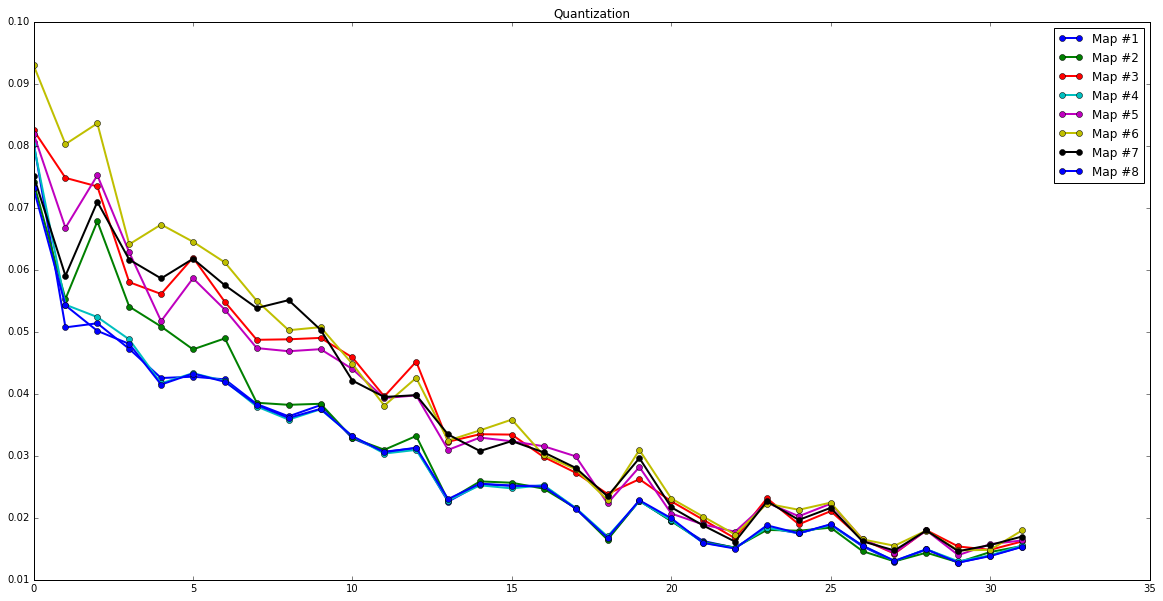

In [7]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_l.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Quantization')
    plt.plot(df_l[df_l['MapNumber']==i].reset_index(drop=True)['quantization'], label= 'Map #'+str(i+1), marker='o',
            linewidth=2.0)
    plt.legend()

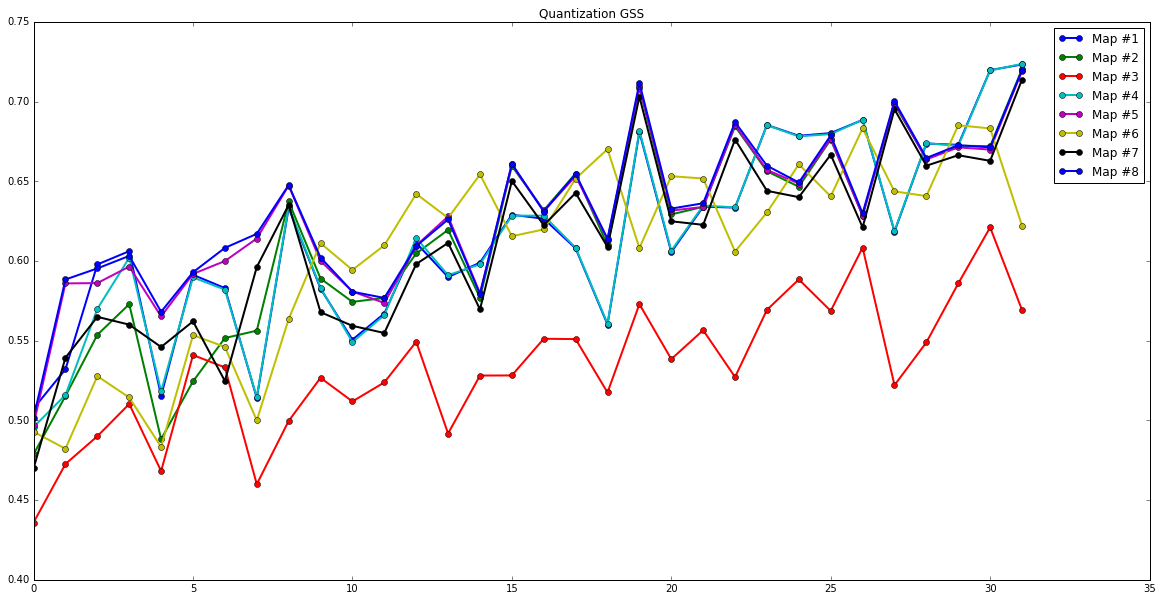

In [8]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_l.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Quantization GSS')
    plt.plot(df_l[df_l['MapNumber']==i].reset_index(drop=True)['quantization_gss'], label= 'Map #'+str(i+1), marker='o',
            linewidth=2.0)
    plt.legend()

## Test during learning (valid)

In [9]:
df_v = pd.read_csv("valid_evaluting_Standard.txt", sep=';')
df_v.head()

,MapNumber,EpochNumber,distortion,distortion_gss,quantization,quantization_gss
0,0,0,0.032769,0.301855,0.103231,0.493616
1,0,1,0.019268,0.320758,0.053300,0.524386
2,0,2,0.018670,0.316513,0.048710,0.538863
3,0,3,0.019598,0.341338,0.052339,0.553300
4,0,4,0.018060,0.314061,0.050969,0.521154


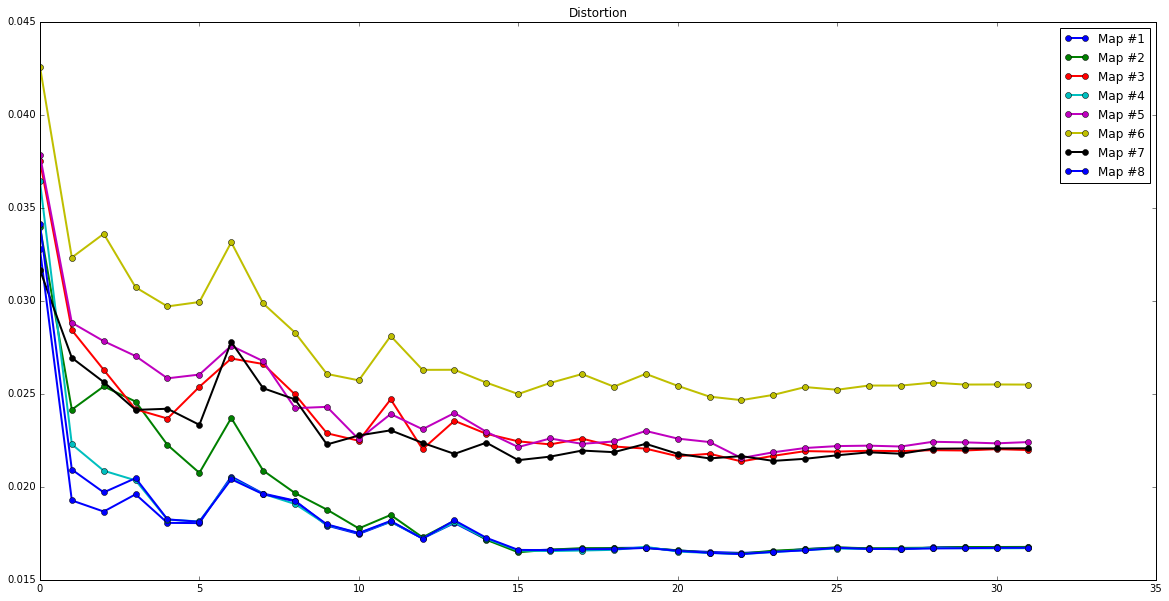

In [10]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_v.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Distortion')
    plt.plot(df_v[df_v['MapNumber']==i].reset_index(drop=True)['distortion'], label= 'Map #'+str(i+1), marker='o',
            linewidth=2.0)
    plt.legend()

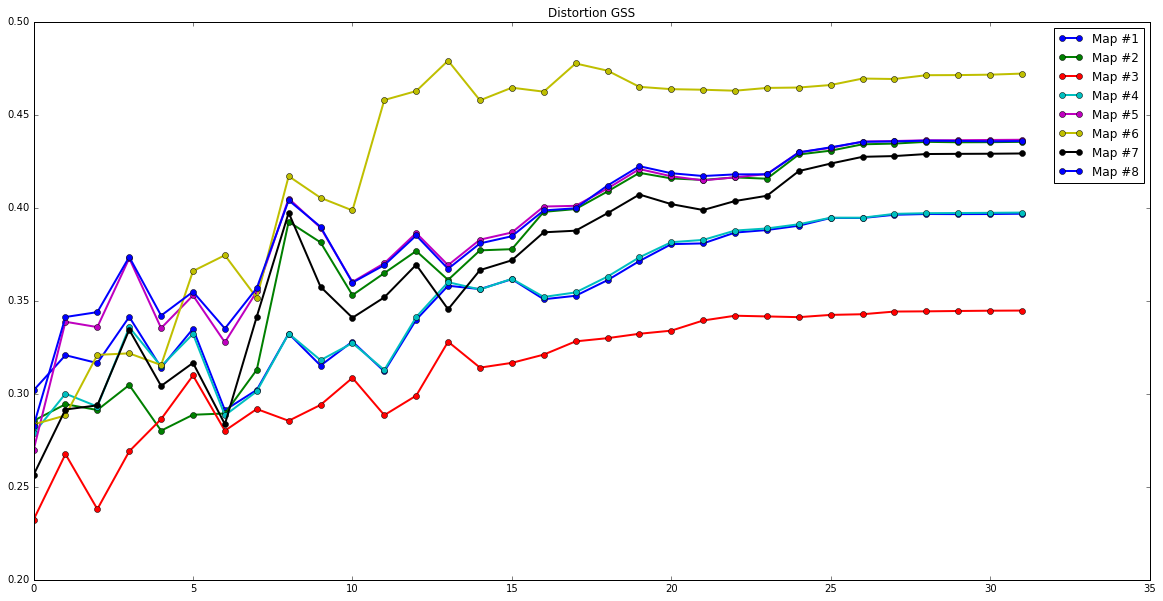

In [11]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_v.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Distortion GSS')
    plt.plot(df_v[df_v['MapNumber']==i].reset_index(drop=True)['distortion_gss'], label= 'Map #'+str(i+1), marker='o',
            linewidth=2.0)
    plt.legend()

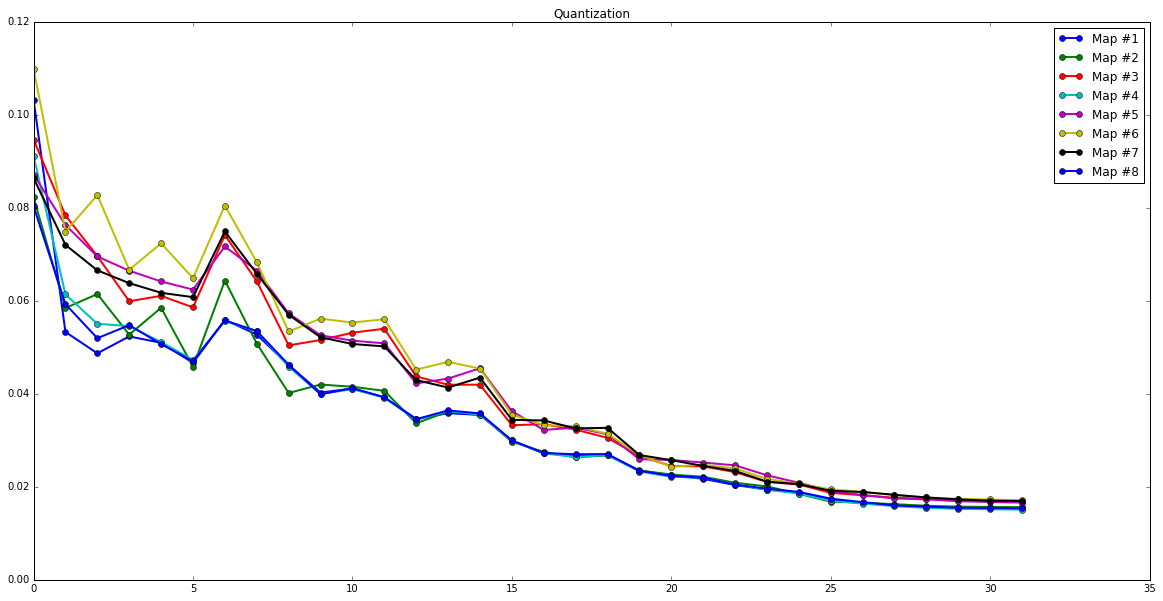

In [12]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_v.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Quantization')
    plt.plot(df_v[df_v['MapNumber']==i].reset_index(drop=True)['quantization'], label= 'Map #'+str(i+1), marker='o',
            linewidth=2.0)
    plt.legend()

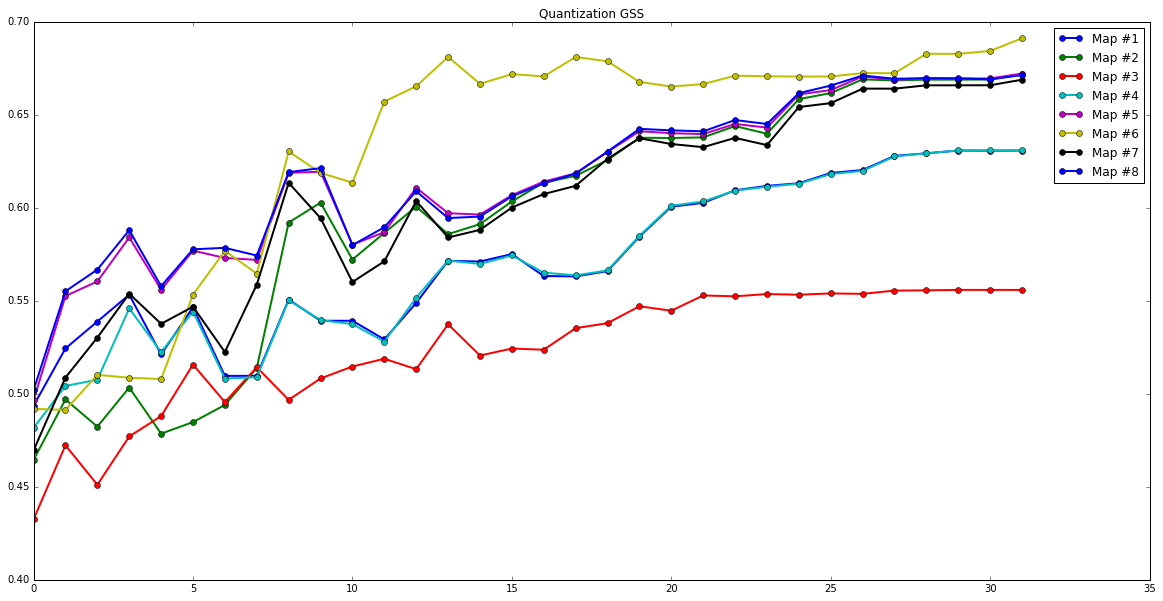

In [13]:
width = 20
height = 10
plt.figure(figsize=(width, height))

for i in df_v.MapNumber.unique():
    #plt.subplot(len(df_l.MapNumber.unique())/2,2,i+1)
    plt.title('Quantization GSS')
    plt.plot(df_v[df_v['MapNumber']==i].reset_index(drop=True)['quantization_gss'], label= 'Map #'+str(i+1), marker='o',
            linewidth=2.0)
    plt.legend()

In [62]:
df_s = pd.read_csv("statistics_Standard.txt", sep=';')
df_s

,PercentageFaults,avg,avg_gss,avg_faulty,avg_gss_faulty,avgdist,avgdist_gss,avgdist_faulty,avgdist_gss_faulty,stddev,stddev_gss,stddev_faulty,stddev_gss_faulty,stddevdist,stddevdist_gss,stddevdist_faulty,stddevdist_gss_faulty
0,0,0.017081,0.672642,0.017081,0.672642,0.020701,0.438081,0.020701,0.438081,0.000942,0.046677,0.000942,0.046677,0.003715,0.036746,0.003715,0.036746
1,1,0.017081,0.672642,0.017204,0.661123,0.020701,0.438081,28.157016,26.761915,0.000942,0.046677,0.001064,0.049042,0.003715,0.036746,3.813798,18.641241
2,2,0.017081,0.672642,0.017439,0.658194,0.020701,0.438081,56.402205,53.608523,0.000942,0.046677,0.001195,0.049181,0.003715,0.036746,5.821161,24.674204
3,3,0.017081,0.672642,0.018097,0.643619,0.020701,0.438081,87.022013,87.842662,0.000942,0.046677,0.001247,0.062389,0.003715,0.036746,8.145175,36.232174
4,4,0.017081,0.672642,0.018964,0.636892,0.020701,0.438081,116.662889,118.623206,0.000942,0.046677,0.001168,0.062820,0.003715,0.036746,8.880165,40.562546
5,5,0.017081,0.672642,0.019840,0.637665,0.020701,0.438081,149.456131,150.546189,0.000942,0.046677,0.001246,0.055161,0.003715,0.036746,9.986666,45.554253
6,6,0.017081,0.672642,0.020715,0.620054,0.020701,0.438081,181.232536,183.438273,0.000942,0.046677,0.001253,0.068815,0.003715,0.036746,9.600172,51.776306
7,7,0.017081,0.672642,0.021988,0.625829,0.020701,0.438081,216.155665,216.554789,0.000942,0.046677,0.001380,0.067399,0.003715,0.036746,11.762861,49.513367
8,8,0.017081,0.672642,0.023325,0.618666,0.020701,0.438081,249.217196,251.625250,0.000942,0.046677,0.001389,0.069676,0.003715,0.036746,12.573985,53.571053
9,9,0.017081,0.672642,0.024570,0.592954,0.020701,0.438081,283.519429,280.252596,0.000942,0.046677,0.001653,0.077580,0.003715,0.036746,12.435398,59.881115


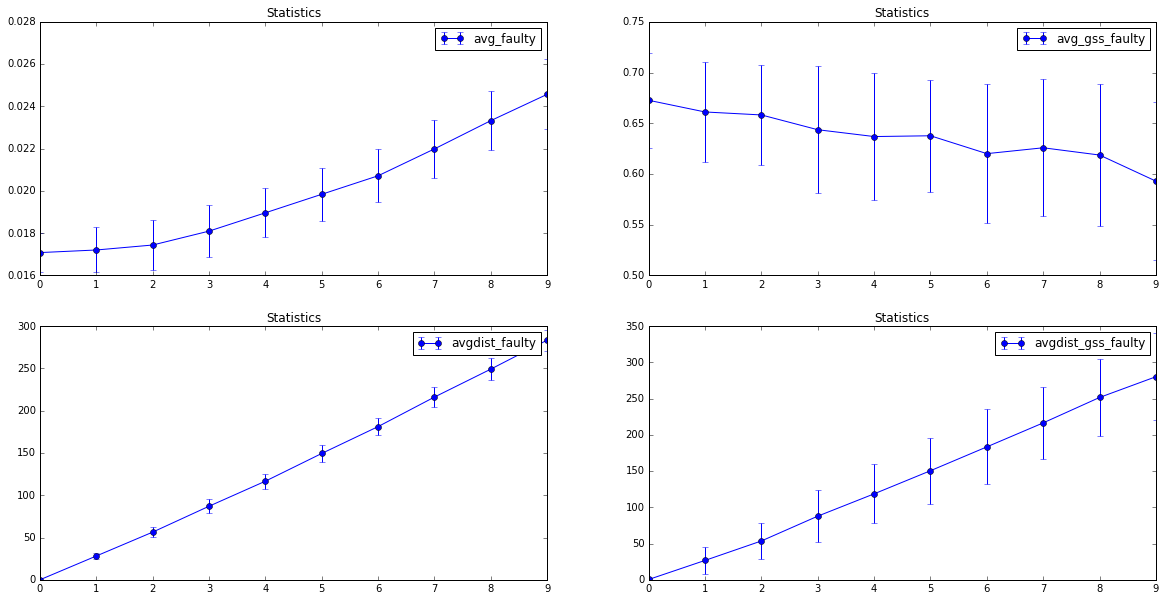

In [61]:
avg = df_s.filter(regex=".*_faulty").filter(regex="avg.*")
clm_num = len(avg.columns)
avg = avg.__iter__()
stddev = df_s.filter(regex=".*_faulty").filter(regex="stddev.*").__iter__()

width = 20
height = 10
plt.figure(figsize=(width, height))

for i in range(0,clm_num):
    plt.subplot(clm_num/2,2,i+1)
    plt.title('Statistics')
    plt.errorbar(range(0,len(df_s)), df_s[avg.__next__()], yerr=df_s[stddev.__next__()], fmt='-o')
    plt.legend()